In [73]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [74]:
TC = pd.read_csv('ToyotaCorolla.csv')

In [75]:
TC.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [76]:
TC.shape

(1436, 39)

In [77]:
TC.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [78]:
TC[['Model', 'Fuel_Type', 'Color']].sample(10)

,Model,Fuel_Type,Color
416,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,Diesel,Black
1048,TOYOTA Corolla 2.0D LINEA TERRA+airco 2/3-Doors,Diesel,Black
306,TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-...,Petrol,Blue
1320,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,Diesel,Green
497,TOYOTA Corolla 1.6 16V HATCHB S 2/3-Doors,Petrol,Black
576,TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-D...,Petrol,Red
561,TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-...,Petrol,Grey
506,TOYOTA Corolla 1.6 VVTI Linea Sol Sedan 4/5-Doors,Petrol,Blue
1132,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,Petrol,Green
122,TOYOTA Corolla 1.6 16V VVT I 5DR TERRA 4/5-Doors,Petrol,Black


The categorical variables are: Model, Fuel_Type & Color

Each dummy variable takes the values 0 or 1; 0 = 'no' for the category 1 = 'yes' 

N-1 dummy binary variables are required to capture the information in a categorical variable with N categories

In [79]:
TC.drop(['Id', 'Model'], axis = 1, inplace = True)

In [80]:
TC['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [81]:
TC.Color.unique()

array(['Blue', 'Silver', 'Black', 'White', 'Grey', 'Red', 'Green',
       'Yellow', 'Violet', 'Beige'], dtype=object)

In [82]:
TC['Fuel_Type'] = TC['Fuel_Type'].astype('category')
TC['Color'] = TC['Color'].astype('category')

In [83]:
TC = pd.get_dummies(TC, drop_first = True)
TC.columns

Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',
       'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Color_Black', 'Color_Blue', 'Color_Green',
       'Color_Grey', 'Color_Red', 'Color_Silver', 'Color_Violet',
       'Color_White', 'Color_Yellow'],
      dtype='object')

In [84]:
TC.corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,-0.038516,0.034896,0.014431,-0.104963,0.169947,-0.103803,0.028562,-0.016848,-0.103360,0.022726
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,0.092611,-0.019399,-0.032955,0.103530,-0.137660,0.098365,-0.028550,0.017916,0.050933,-0.040883
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,-0.049646,0.008067,0.057279,-0.030403,-0.031214,0.008646,-0.017838,-0.028353,-0.001445,0.001609
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,-0.084162,0.018052,0.022763,-0.098638,0.144152,-0.100526,0.031958,-0.012880,-0.050977,0.040837
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.433160,0.039012,-0.003840,-0.017439,-0.112194,0.052190,0.006113,0.018810,0.130403,-0.037995
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.489110,-0.002040,-0.027949,0.021242,0.021349,0.011700,0.014300,-0.012359,-0.093928,-0.000516
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.004872,0.061789,0.044972,0.084797,0.072634,-0.261828,0.104902,0.036691,-0.203738,0.031764
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,0.080249,-0.041491,-0.005847,0.056846,0.001725,-0.026799,0.045772,-0.012837,-0.036079,-0.011114
CC,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,-0.315170,-0.007964,0.029421,-0.010579,-0.009867,-0.008865,-0.001351,-0.015804,0.027304,-0.011884
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,-0.027589,-0.099880,-0.044962,0.060186,0.059174,-0.000541,0.028644,0.012019,-0.010245,0.014409


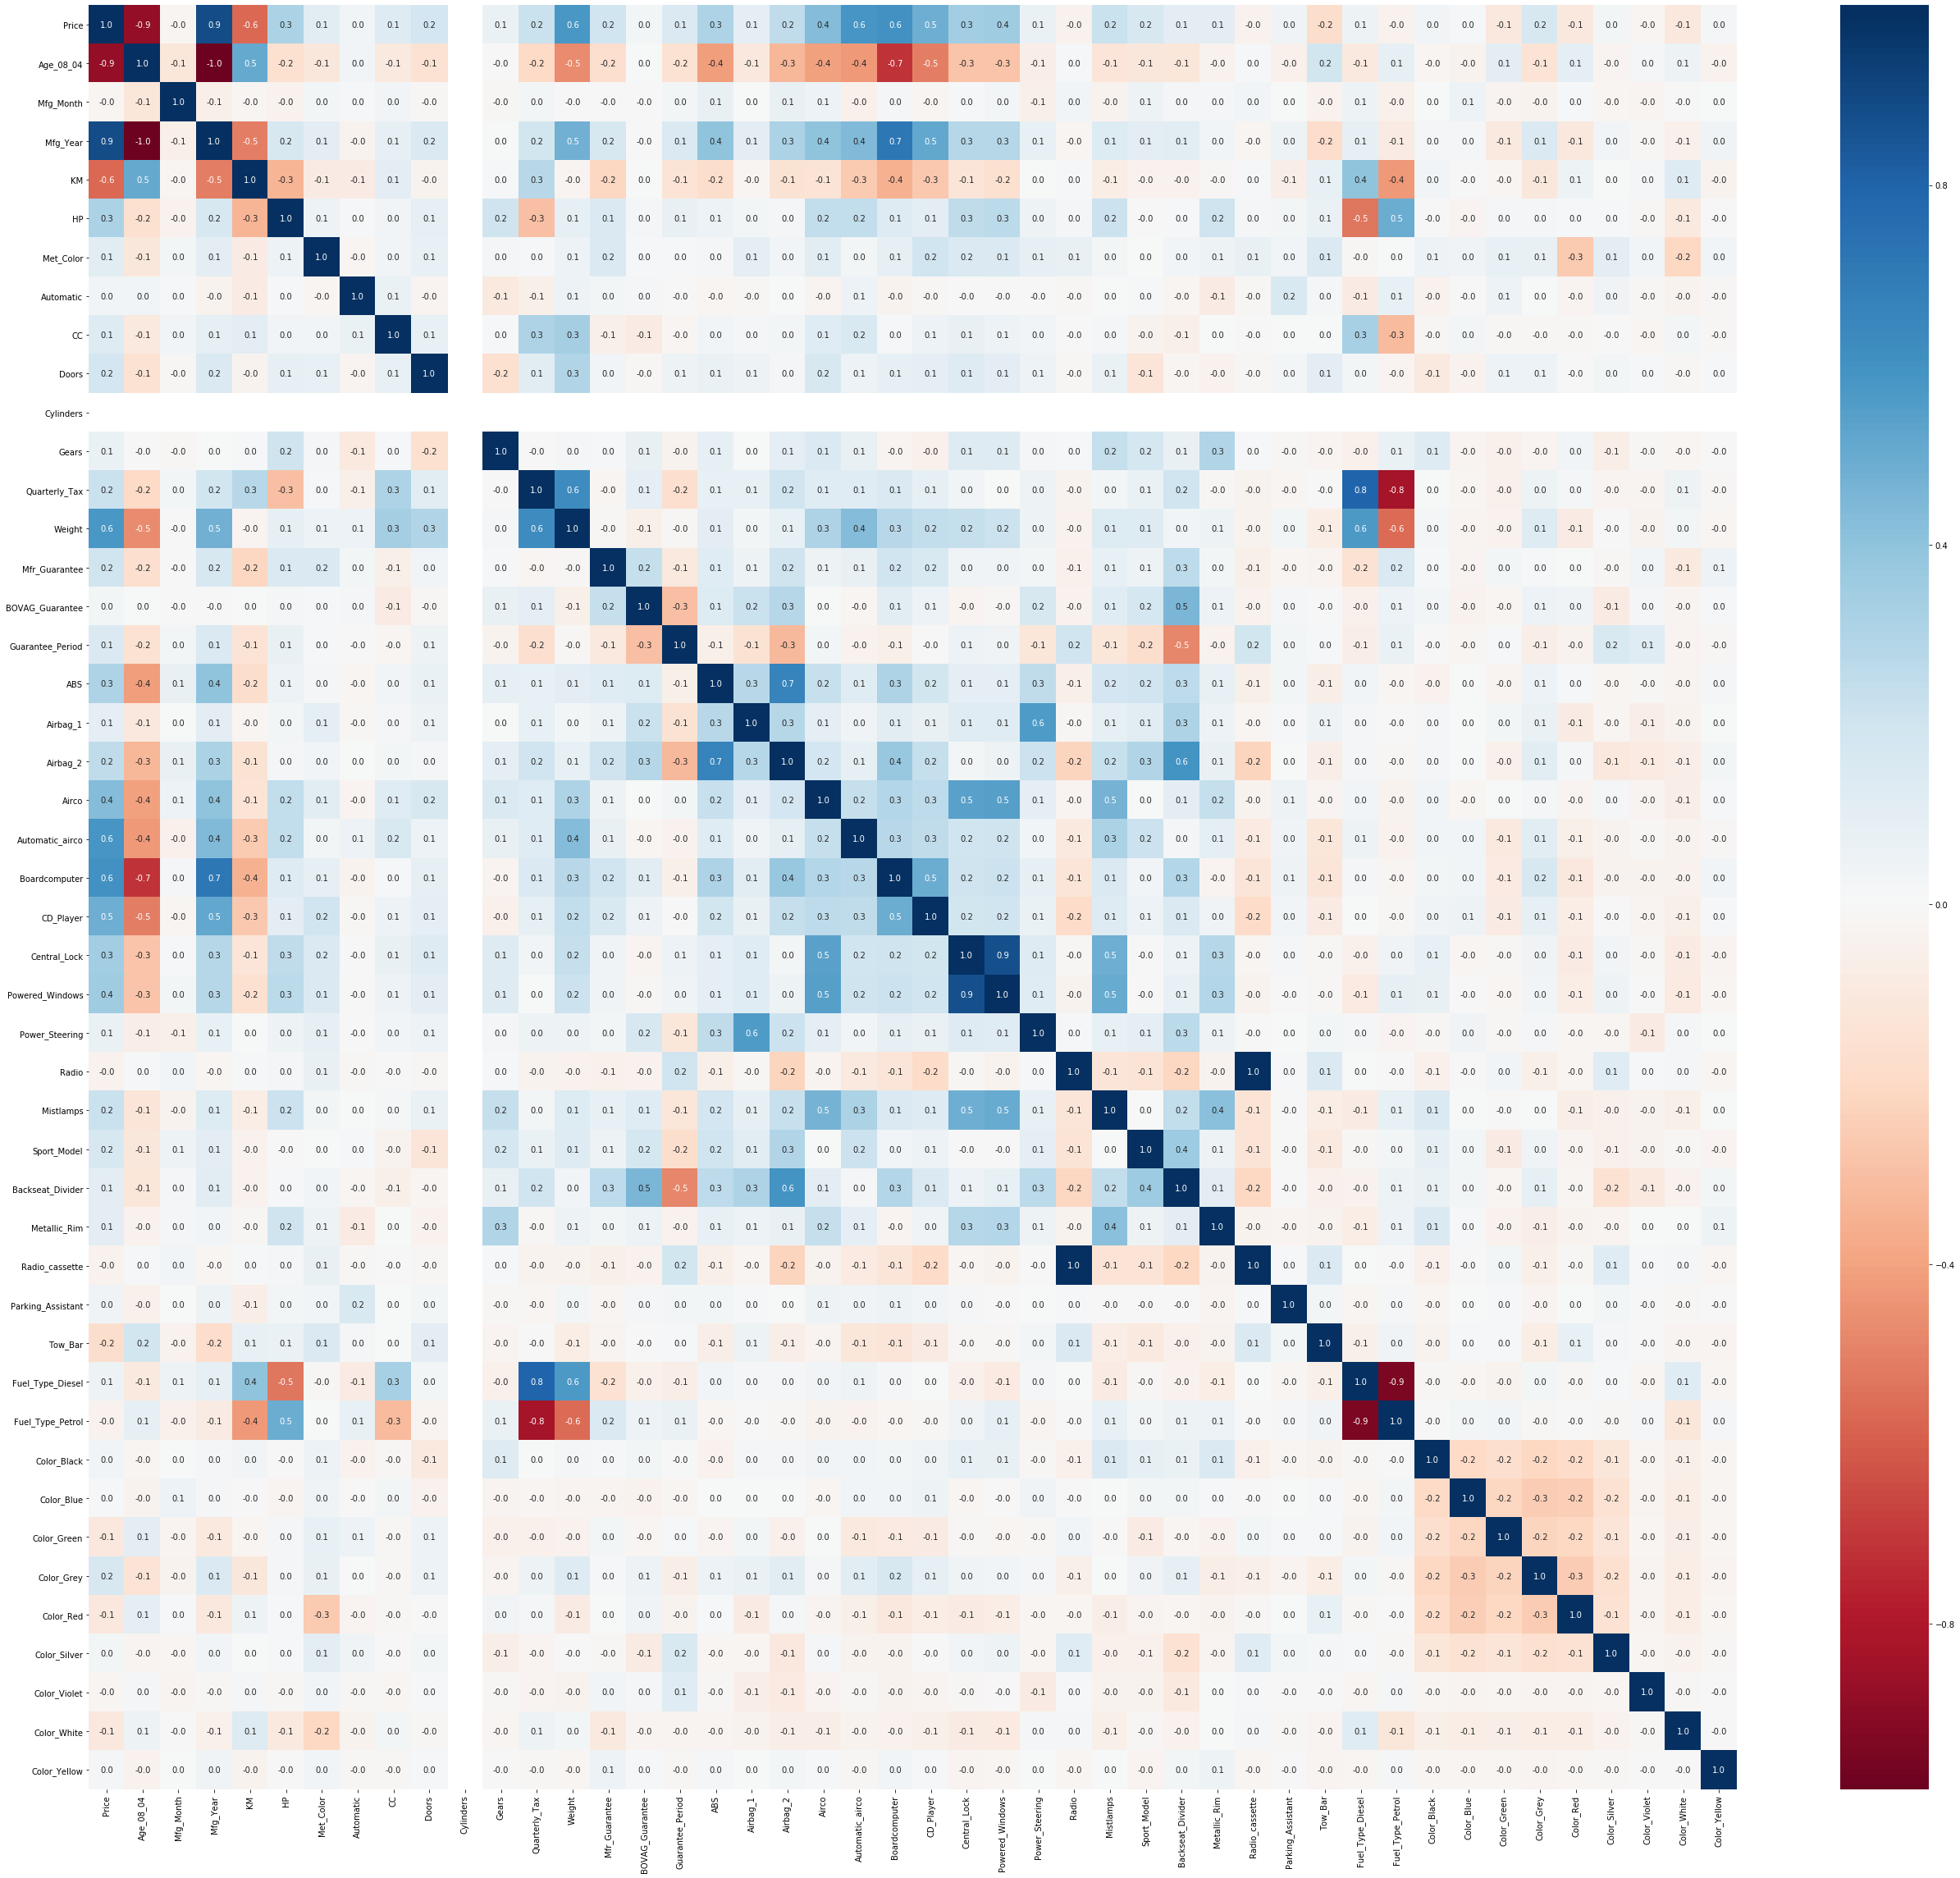

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(45, 40)
sns.heatmap(TC.corr(), annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()